<a href="https://colab.research.google.com/github/Hireath08/CognoRise-InfoTech/blob/main/SPAM_MAIL_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv')

In [18]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [20]:
data.shape

(5572, 2)

In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
data.dtypes

Category    object
Message     object
dtype: object

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

In [12]:
data.dtypes

Category     int64
Message     object
dtype: object

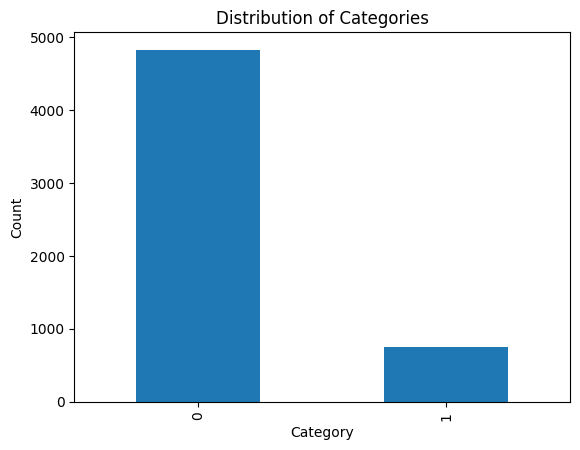

In [36]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
data['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text messages
x = vectorizer.fit_transform(data['Message'])
y = data['Category']


###**CROSS-VALIDATION**

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

#####**LOGISTIC REGRESSION**

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [74]:
from sklearn.metrics import accuracy_score, classification_report
lr_pred = model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9874439461883409
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.94      0.96      0.95       139

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Applying SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

lr_model_oversampled = LogisticRegression()
lr_model_oversampled.fit(x_train_resampled, y_train_resampled)

lr_pred = lr_model_oversampled.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9865470852017937
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.92      0.94       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [79]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

under_sampler = RandomUnderSampler(random_state=42)
x_train_u, y_train_u = under_sampler.fit_resample(x_train, y_train)

lr_model_undersampled = LogisticRegression()
lr_model_undersampled.fit(x_train_resampled, y_train_resampled)

lr_pred = lr_model_undersampled.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9865470852017937
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.97      0.92      0.94       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



####**RANDOM FOREST CLASSIFIER**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.97847533632287
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       1.00      0.83      0.91       139

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



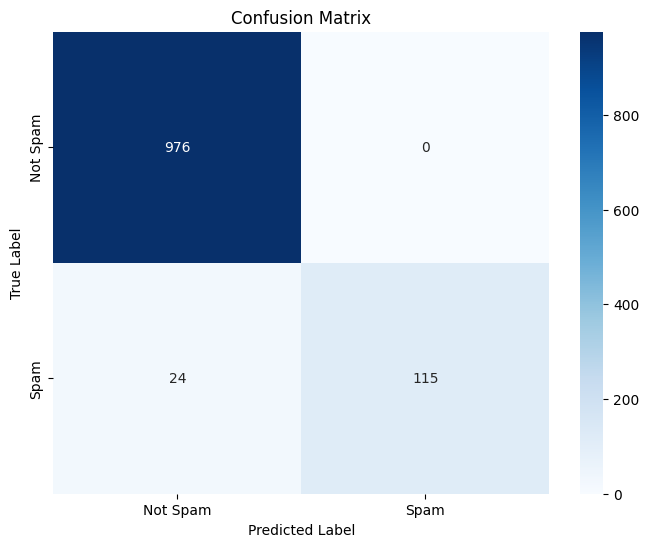

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming rf_pred is your predicted labels
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##**ADA BOOST CLASSIFIER**

In [105]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model_decision_tree = DecisionTreeClassifier(max_depth=3)
base_model_logistic_regression = LogisticRegression()
base_model_random_forest = RandomForestClassifier(max_depth=3)

ada_model = AdaBoostClassifier(base_model_random_forest, n_estimators=70, learning_rate=0.9, random_state=42)

ada_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=70, random_state=42)

In [106]:
ada_pred = ada_model.predict(x_test)
print("AdaBoosting Accuracy:", accuracy_score(y_test, ada_pred))
print("AdaBoosting Classification Report:\n", classification_report(y_test, ada_pred))


AdaBoosting Accuracy: 0.9829596412556054
AdaBoosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.99      0.87      0.93       139

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



###**KNN CLASSIFIER**

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']


In [113]:
best_k

3

In [114]:
best_metric

'cosine'

In [116]:
final_knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn_model.fit(x_train,y_train)
knn_pred = final_knn_model.predict(x_test)
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))
print("k-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_pred))

k-Nearest Neighbors Accuracy: 0.9757847533632287
k-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       976
           1       0.99      0.81      0.89       139

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

